In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% inline matplotlib

UsageError: Line magic function `%` not found.


In [4]:
data=pd.read_excel("C:/Users/Anupa/Desktop/Learnby- Machine learning & AI/Statistics & Machine Learning_August 2020/PPT & CODE/Logistic Regression/Practise Code/card_def_data_practice.xlsx",header=0)

In [5]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
data.shape

(30000, 25)

In [7]:
data.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
# To check for missing Values
data.info()


# No missing value is present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
# To check for outliers
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
data.quantile([0.01,0.99])

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0.01,300.99,10000.0,1.0,1.0,1.0,22.0,-2.0,-2.0,-2.0,-2.0,...,-212.02,-232.01,-331.03,0.00,0.00,0.0,0.00,0.00,0.00,0.0
0.99,29700.01,500000.0,2.0,5.0,3.0,60.0,3.0,3.0,3.0,3.0,...,304997.27,285868.33,279505.06,66522.18,76651.02,70000.0,67054.44,65607.56,82619.05,1.0


In [11]:
# Droping unnecessary variable
data=data.drop("ID",axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [12]:
# Renaming of dependent Variable
data=data.rename(columns={"default payment next month": "Default"})
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [15]:
# Splitting of Dependent & Independent Vaiable

X=data.drop("Default",axis=1)
Y=data["Default"]

In [16]:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [17]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,166808.656000,1.603733,1.851900,1.553667,35.447167,-0.026433,-0.142767,-0.176533,-0.233867,-0.278433,...,46174.230967,42510.317067,39581.215733,38200.797233,5029.561633,5088.719567,4555.447400,4246.447100,4200.113300,4553.894133
std,127584.472995,0.489129,0.781656,0.518326,9.090242,1.083593,1.164057,1.156639,1.113829,1.079821,...,64352.130474,60049.132356,56585.314536,55409.361537,9430.870444,10341.622162,9560.267421,9272.507135,9063.279373,11039.458690
min,10000.000000,1.000000,1.000000,1.000000,22.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-200.000000,-212.020000,-232.010000,-331.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000
max,500000.000000,2.000000,5.000000,3.000000,60.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,325030.390000,304997.270000,285868.330000,279505.060000,66522.180000,76651.020000,70000.000000,67054.440000,65607.560000,82619.050000


In [18]:
# Create Some features based on business logic

X['Avg_Pay_Last6m']=(X['PAY_AMT1']+X['PAY_AMT2']+X['PAY_AMT3']+X['PAY_AMT4']+X['PAY_AMT5']+X['PAY_AMT6'])/6
X['Max_Pay_Last6m']=X[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].max(axis=1)
X['Avg_Bill_Amt_Last6m']=(X['BILL_AMT1']+X['BILL_AMT2']+X['BILL_AMT3']+X['BILL_AMT4']+X['BILL_AMT5']+X['BILL_AMT6'])/6
X['Max_Bill_Amt_Last6m']=X[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].max(axis=1)
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Avg_Pay_Last6m,Max_Pay_Last6m,Avg_Bill_Amt_Last6m,Max_Bill_Amt_Last6m
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,689.0,0,0.0,0.0,0.0,114.833333,689.0,1284.000000,3913.0
1,120000,2,2,2,26,-1,2,0,0,0,...,0.0,1000.0,1000,1000.0,0.0,2000.0,833.333333,2000.0,2846.166667,3455.0
2,90000,2,2,2,34,0,0,0,0,0,...,1518.0,1500.0,1000,1000.0,1000.0,5000.0,1836.333333,5000.0,16942.166667,29239.0
3,50000,2,2,1,37,0,0,0,0,0,...,2000.0,2019.0,1200,1100.0,1069.0,1000.0,1398.000000,2019.0,38555.666667,49291.0
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000.0,36681.0,10000,9000.0,689.0,679.0,9841.500000,36681.0,18223.166667,35835.0


In [19]:
# Next step is to create Buckets/bins to study the rank & plots

from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_binned=discrete.fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:197: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  'decreasing the

In [20]:
X_binned

array([[0., 0., 1., ..., 0., 1., 1.],
       [4., 0., 1., ..., 2., 1., 1.],
       [3., 0., 1., ..., 5., 4., 4.],
       ...,
       [1., 0., 1., ..., 8., 3., 3.],
       [3., 0., 2., ..., 9., 6., 7.],
       [2., 0., 1., ..., 2., 6., 6.]])

In [21]:
# Now convert this to dataframe
X_binned1=pd.DataFrame(X_binned,index=X.index,columns=X.columns)
X_binned2=X_binned1.add_suffix("_Rank")

In [22]:
X_binned2

,LIMIT_BAL_Rank,SEX_Rank,EDUCATION_Rank,MARRIAGE_Rank,AGE_Rank,PAY_0_Rank,PAY_2_Rank,PAY_3_Rank,PAY_4_Rank,PAY_5_Rank,...,PAY_AMT1_Rank,PAY_AMT2_Rank,PAY_AMT3_Rank,PAY_AMT4_Rank,PAY_AMT5_Rank,PAY_AMT6_Rank,Avg_Pay_Last6m_Rank,Max_Pay_Last6m_Rank,Avg_Bill_Amt_Last6m_Rank,Max_Bill_Amt_Last6m_Rank
0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,4.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,2.0,...,0.0,1.0,2.0,2.0,0.0,3.0,1.0,2.0,1.0,1.0
2,3.0,0.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,6.0,4.0,5.0,4.0,4.0
3,2.0,0.0,1.0,0.0,6.0,2.0,2.0,2.0,2.0,2.0,...,3.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0,6.0
4,2.0,0.0,1.0,0.0,9.0,1.0,2.0,1.0,2.0,2.0,...,3.0,8.0,8.0,6.0,1.0,1.0,8.0,9.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,7.0,0.0,2.0,0.0,6.0,2.0,2.0,2.0,2.0,2.0,...,7.0,8.0,6.0,4.0,6.0,2.0,8.0,8.0,8.0,9.0
29996,5.0,0.0,2.0,1.0,8.0,1.0,1.0,1.0,1.0,2.0,...,3.0,5.0,7.0,0.0,0.0,0.0,5.0,6.0,2.0,2.0
29997,1.0,0.0,1.0,1.0,6.0,4.0,3.0,3.0,1.0,2.0,...,0.0,0.0,8.0,5.0,3.0,4.0,7.0,8.0,3.0,3.0
29998,3.0,0.0,2.0,0.0,7.0,3.0,1.0,2.0,2.0,2.0,...,8.0,5.0,2.0,3.0,7.0,3.0,9.0,9.0,6.0,7.0


In [23]:
#  Join the binned dataframe with dependent variable
Join_binned=pd.concat([Y,X_binned2],join="inner",axis=1)
Join_binned

,Default,LIMIT_BAL_Rank,SEX_Rank,EDUCATION_Rank,MARRIAGE_Rank,AGE_Rank,PAY_0_Rank,PAY_2_Rank,PAY_3_Rank,PAY_4_Rank,...,PAY_AMT1_Rank,PAY_AMT2_Rank,PAY_AMT3_Rank,PAY_AMT4_Rank,PAY_AMT5_Rank,PAY_AMT6_Rank,Avg_Pay_Last6m_Rank,Max_Pay_Last6m_Rank,Avg_Bill_Amt_Last6m_Rank,Max_Bill_Amt_Last6m_Rank
0,1,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,1,4.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,...,0.0,1.0,2.0,2.0,0.0,3.0,1.0,2.0,1.0,1.0
2,0,3.0,0.0,1.0,1.0,5.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,6.0,4.0,5.0,4.0,4.0
3,0,2.0,0.0,1.0,0.0,6.0,2.0,2.0,2.0,2.0,...,3.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,6.0,6.0
4,0,2.0,0.0,1.0,0.0,9.0,1.0,2.0,1.0,2.0,...,3.0,8.0,8.0,6.0,1.0,1.0,8.0,9.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,7.0,0.0,2.0,0.0,6.0,2.0,2.0,2.0,2.0,...,7.0,8.0,6.0,4.0,6.0,2.0,8.0,8.0,8.0,9.0
29996,0,5.0,0.0,2.0,1.0,8.0,1.0,1.0,1.0,1.0,...,3.0,5.0,7.0,0.0,0.0,0.0,5.0,6.0,2.0,2.0
29997,1,1.0,0.0,1.0,1.0,6.0,4.0,3.0,3.0,1.0,...,0.0,0.0,8.0,5.0,3.0,4.0,7.0,8.0,3.0,3.0
29998,1,3.0,0.0,2.0,0.0,7.0,3.0,1.0,2.0,2.0,...,8.0,5.0,2.0,3.0,7.0,3.0,9.0,9.0,6.0,7.0


In [24]:
# To check the event rate & matched with the existing event rate
Join_binned["Default"].mean()

0.2212

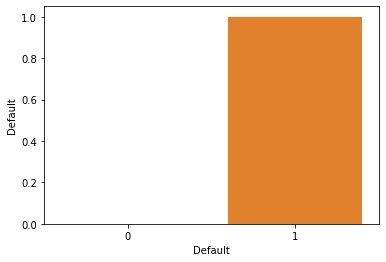

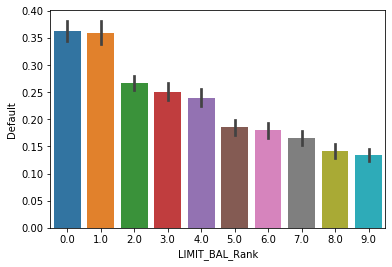

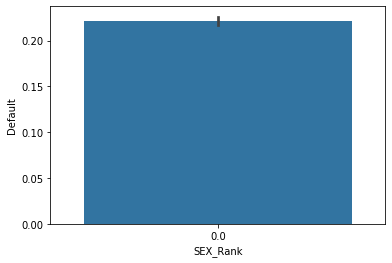

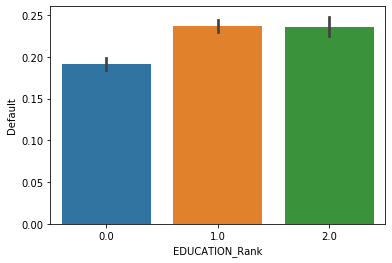

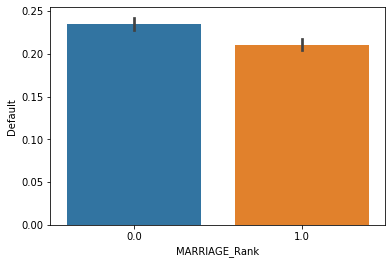

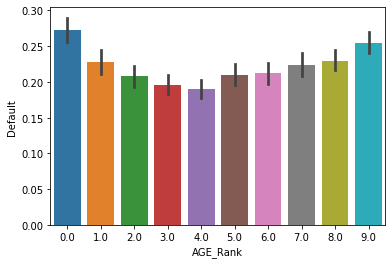

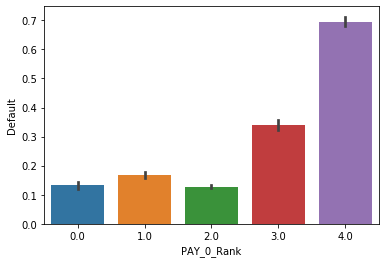

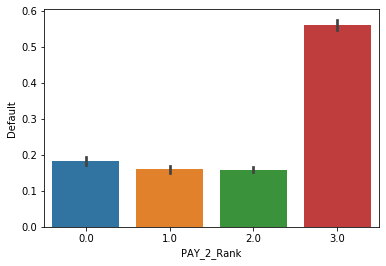

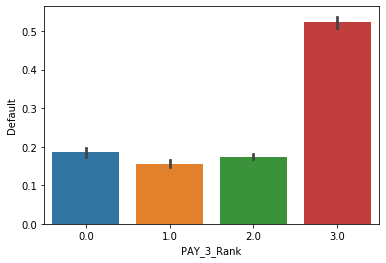

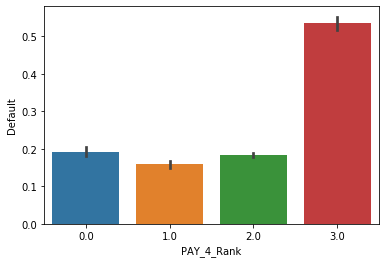

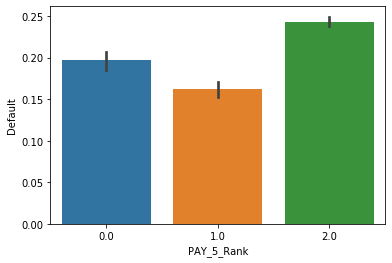

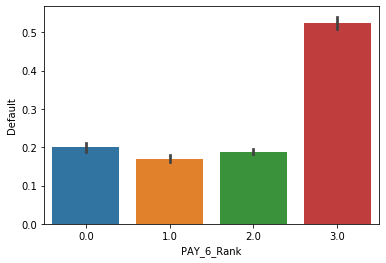

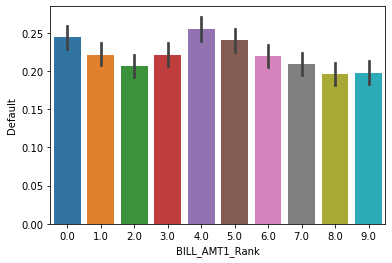

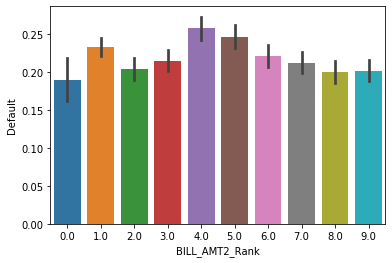

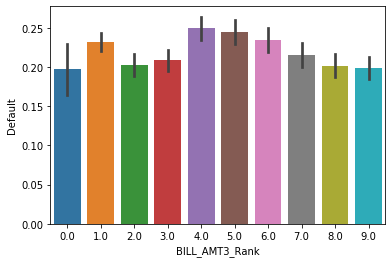

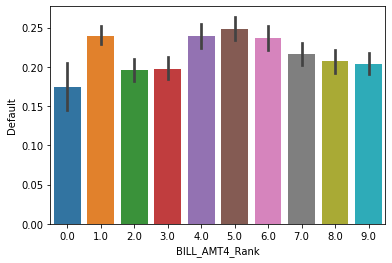

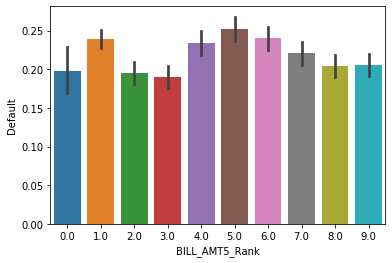

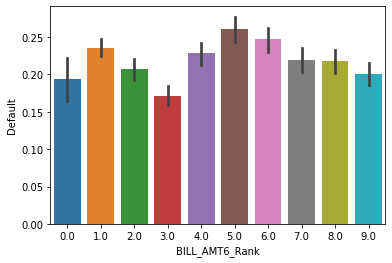

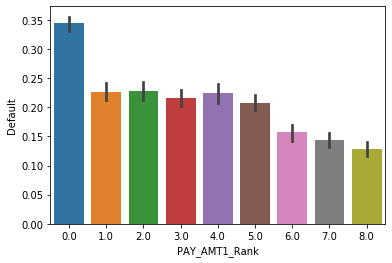

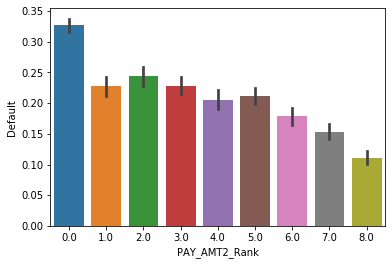

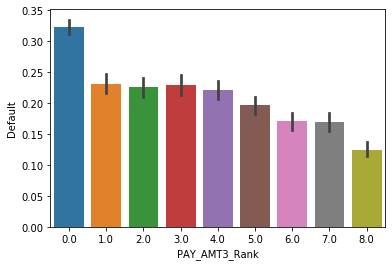

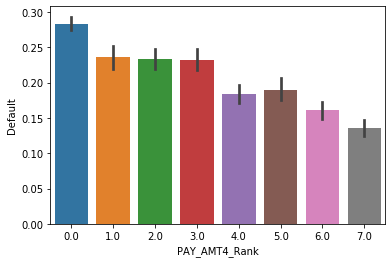

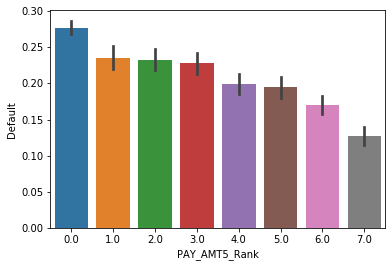

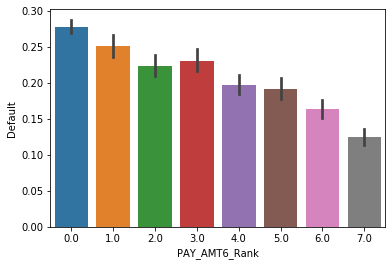

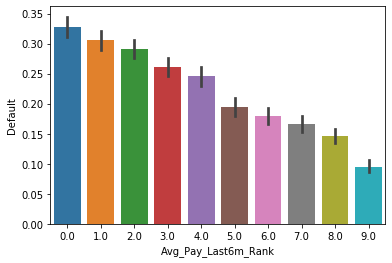

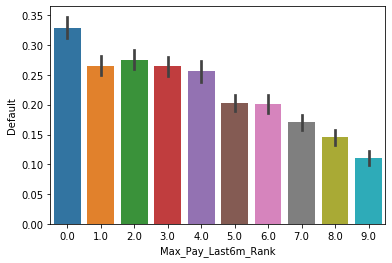

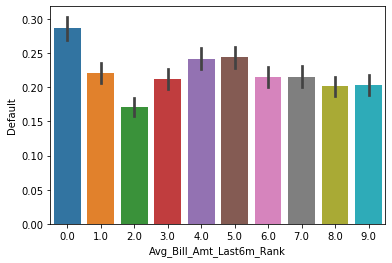

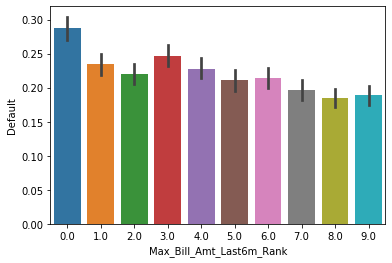

In [25]:
# create a Plots on the basis of ranks
from numpy import mean
for i in Join_binned.columns:
    plt.show()
    sns.barplot(x=i,y="Default",data=Join_binned,estimator=mean)

In [26]:
#Since Billing Amt is not the strong a discriminator, Let us try to create a variable that shows a recent spike or fall in spend
#There ia a term called FRUT - Financial Revolving Unsecured Trade
#In FRUT businesses, it is important to analyze Out of pattern behaviour


In [27]:
X['OOP_spend1']=(X['BILL_AMT1']/X['Avg_Pay_Last6m']).fillna(0)
X['OOP_spend2']=(X['BILL_AMT2']/X['Avg_Pay_Last6m']).fillna(0)
X['OOP_spend3']=(X['BILL_AMT3']/X['Avg_Pay_Last6m']).fillna(0)
X['OOP_spend4']=(X['BILL_AMT4']/X['Avg_Pay_Last6m']).fillna(0)
X['OOP_spend5']=(X['BILL_AMT5']/X['Avg_Pay_Last6m']).fillna(0)
X['OOP_spend6']=(X['BILL_AMT6']/X['Avg_Pay_Last6m']).fillna(0)

In [28]:
# Lets Check Its efficacy as predictor
X['OOP_spend_rank1']=pd.qcut(X['OOP_spend1'].rank(method='first').values,10,duplicates='drop').codes+1
X['OOP_spend_rank2']=pd.qcut(X['OOP_spend2'].rank(method='first').values,10,duplicates='drop').codes+1
X['OOP_spend_rank3']=pd.qcut(X['OOP_spend3'].rank(method='first').values,10,duplicates='drop').codes+1
X['OOP_spend_rank4']=pd.qcut(X['OOP_spend4'].rank(method='first').values,10,duplicates='drop').codes+1
X['OOP_spend_rank5']=pd.qcut(X['OOP_spend5'].rank(method='first').values,10,duplicates='drop').codes+1
X['OOP_spend_rank6']=pd.qcut(X['OOP_spend6'].rank(method='first').values,10,duplicates='drop').codes+1
X_all=pd.concat([Y,X], axis=1, join='inner')

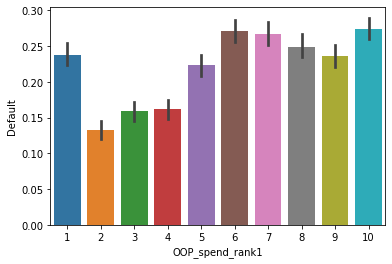

In [29]:
ax=sns.barplot(x="OOP_spend_rank1", y="Default", data=X_all, estimator=mean)

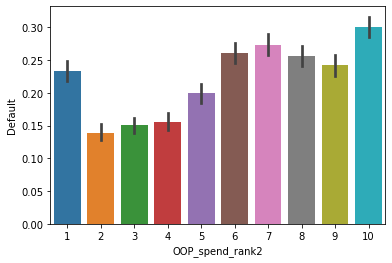

In [30]:
ax=sns.barplot(x="OOP_spend_rank2", y="Default", data=X_all, estimator=mean)

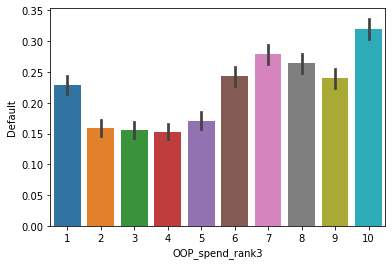

In [31]:
ax=sns.barplot(x="OOP_spend_rank3", y="Default", data=X_all, estimator=mean)

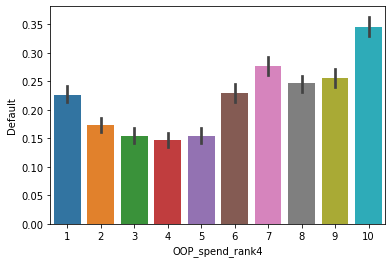

In [32]:
ax=sns.barplot(x="OOP_spend_rank4", y="Default", data=X_all, estimator=mean)

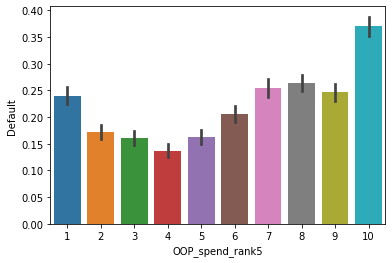

In [33]:
ax=sns.barplot(x="OOP_spend_rank5", y="Default", data=X_all, estimator=mean)

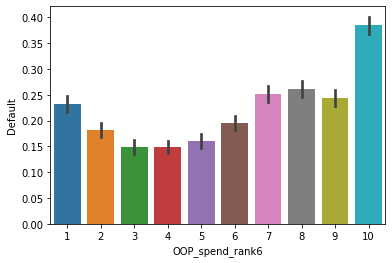

In [34]:
ax=sns.barplot(x="OOP_spend_rank6", y="Default", data=X_all, estimator=mean)

In [35]:
X_all.groupby('OOP_spend_rank1')['Default'].mean()

OOP_spend_rank1
1     0.238333
2     0.132333
3     0.158667
4     0.162000
5     0.223333
6     0.271333
7     0.267333
8     0.249333
9     0.235667
10    0.273667
Name: Default, dtype: float64

In [38]:
X_all['OOP_custom_bin1']=np.where(X['OOP_spend_rank1']<=5,1,0)
X_all.groupby('OOP_custom_bin1')['Default'].mean()

OOP_custom_bin1
0    0.259467
1    0.182933
Name: Default, dtype: float64

In [39]:
X_all.groupby('OOP_spend_rank2')['Default'].mean()

OOP_spend_rank2
1     0.234000
2     0.139333
3     0.150333
4     0.156000
5     0.199667
6     0.260333
7     0.273667
8     0.256333
9     0.242000
10    0.300333
Name: Default, dtype: float64

In [40]:
X_all['OOP_custom_bin2']=np.where(X['OOP_spend_rank2']<=5,1,0)
X_all.groupby('OOP_custom_bin2')['Default'].mean()

OOP_custom_bin2
0    0.266533
1    0.175867
Name: Default, dtype: float64

In [42]:
X_all.groupby('OOP_spend_rank3')['Default'].mean()

OOP_spend_rank3
1     0.229000
2     0.158667
3     0.155000
4     0.152667
5     0.170667
6     0.243000
7     0.279000
8     0.264000
9     0.240333
10    0.319667
Name: Default, dtype: float64

In [43]:
X_all['OOP_custom_bin3']=np.where(X['OOP_spend_rank3']<=5,1,0)
X_all.groupby('OOP_custom_bin3')['Default'].mean()

OOP_custom_bin3
0    0.2692
1    0.1732
Name: Default, dtype: float64

In [44]:
X_all.groupby('OOP_spend_rank4')['Default'].mean()

OOP_spend_rank4
1     0.227000
2     0.173667
3     0.153667
4     0.146667
5     0.155000
6     0.230000
7     0.277667
8     0.246333
9     0.256000
10    0.346000
Name: Default, dtype: float64

In [45]:
X_all['OOP_custom_bin4']=np.where(X['OOP_spend_rank4']<=5,1,0)
X_all.groupby('OOP_custom_bin4')['Default'].mean()

OOP_custom_bin4
0    0.2712
1    0.1712
Name: Default, dtype: float64

In [46]:
X_all.groupby('OOP_spend_rank5')['Default'].mean()

OOP_spend_rank5
1     0.239333
2     0.172333
3     0.161000
4     0.137000
5     0.162667
6     0.205333
7     0.254000
8     0.264000
9     0.246333
10    0.370000
Name: Default, dtype: float64

In [47]:
X_all['OOP_custom_bin5']=np.where(X['OOP_spend_rank5']<=5,1,0)
X_all.groupby('OOP_custom_bin5')['Default'].mean()

OOP_custom_bin5
0    0.267933
1    0.174467
Name: Default, dtype: float64

In [48]:
X_all.groupby('OOP_spend_rank5')['Default'].mean()

OOP_spend_rank5
1     0.239333
2     0.172333
3     0.161000
4     0.137000
5     0.162667
6     0.205333
7     0.254000
8     0.264000
9     0.246333
10    0.370000
Name: Default, dtype: float64

In [49]:
X_all['OOP_custom_bin5']=np.where(X['OOP_spend_rank5']<=5,1,0)
X_all.groupby('OOP_custom_bin5')['Default'].mean()

OOP_custom_bin5
0    0.267933
1    0.174467
Name: Default, dtype: float64

In [ ]:
# We have consider OOP_custom_bin5 in our indepenedent feature list because the variation on either side 
# of the event rate(i.e 0.2257) is more in OOP_custom_bin5

In [52]:
# Now Create the Overall list of dependent & indepenedent variable
indep=["LIMIT_BAL",'PAY_0','PAY_2','PAY_3','PAY_5',"PAY_6",'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Avg_Pay_Last6m','Max_Pay_Last6m','OOP_custom_bin5']
dep=['Default']
X_indep=X_all[indep]
Y_dep=X_all[dep]
Y_dep.mean()

Default    0.2212
dtype: float64

In [50]:
X_all.columns

Index(['Default', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Avg_Pay_Last6m', 'Max_Pay_Last6m', 'Avg_Bill_Amt_Last6m',
       'Max_Bill_Amt_Last6m', 'OOP_spend1', 'OOP_spend2', 'OOP_spend3',
       'OOP_spend4', 'OOP_spend5', 'OOP_spend6', 'OOP_spend_rank1',
       'OOP_spend_rank2', 'OOP_spend_rank3', 'OOP_spend_rank4',
       'OOP_spend_rank5', 'OOP_spend_rank6', 'OOP_custom_bin1',
       'OOP_custom_bin2', 'OOP_custom_bin3', 'OOP_custom_bin4',
       'OOP_custom_bin5'],
      dtype='object')

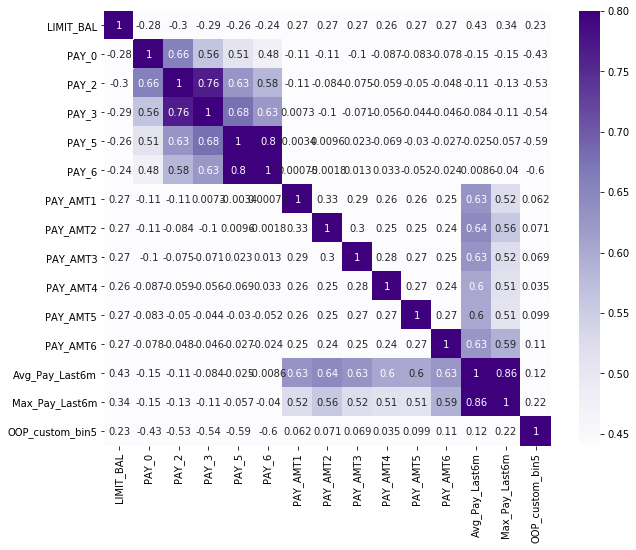

In [61]:
# Plot the heatmap to see the collinearity between independent variable
corr=X_indep.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, vmin=0.44,
    vmax=0.8,
    cmap="Purples",
    annot=True,
    fmt='.2g',
    cbar=True)

In [103]:

indep1=["LIMIT_BAL",'PAY_0',"PAY_6",'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Avg_Pay_Last6m','OOP_custom_bin5']
dep=['Default']
X_indep1=X_all[indep1]
Y_dep=X_all[dep]
Y_dep.mean()


Default    0.2212
dtype: float64

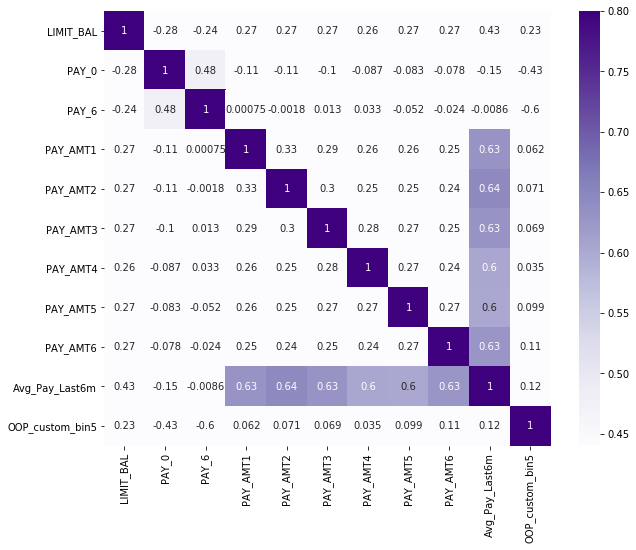

In [104]:
# Again draw the heat map after removing some independent features
corr1=X_indep1.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr1, vmin=0.44,
    vmax=0.8,
    cmap="Purples",
    annot=True,
    fmt='.2g',
    cbar=True)

In [105]:
# Train_Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_indep1,Y_dep, test_size=0.3,random_state=42)

In [106]:
# Check for randomness of train and test by testing the event rates across the two datasets
print(y_train.mean())
print(y_test.mean())
print(X_test.shape)


Default    0.222667
dtype: float64
Default    0.217778
dtype: float64
(9000, 11)


In [107]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
logreg.score(X_train,y_train)

0.807952380952381

In [109]:
y_pred=logreg.predict(X_test)

In [110]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8061111111111111
Precision: 0.6050830889540567
Recall: 0.31581632653061226


In [111]:
# Next Step is to build our Gains Chart
y_pred_prob = logreg.predict_proba(X_indep1)[:, 1]
X_all['y_pred_P']=pd.DataFrame(y_pred_prob)
X_all['P_Rank_RF']=pd.qcut(X_all['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df=X_all.groupby('P_Rank_RF')['Default'].agg(['count','mean'])
rank_df=pd.DataFrame(rank_df)
sorted_rank_df=rank_df.sort_values(by='P_Rank_RF',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['mean']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['decile']=sorted_reindexed.index+1
sorted_reindexed



# From the gains chart it is seen that , the given model w

,P_Rank_RF,count,mean,N_events,cum_events,event_cap,cum_event_cap,random_cap,cum_random_cap,decile
0,10,3000,0.648333,1945.0,1945.0,0.293098,0.293098,0.1,0.1,1
1,9,3000,0.350000,1050.0,2995.0,0.158228,0.451326,0.1,0.2,2
2,8,3000,0.210333,631.0,3626.0,0.095087,0.546414,0.1,0.3,3
3,7,3000,0.185000,555.0,4181.0,0.083635,0.630048,0.1,0.4,4
4,6,3000,0.167000,501.0,4682.0,0.075497,0.705546,0.1,0.5,5
5,5,3000,0.167333,502.0,5184.0,0.075648,0.781193,0.1,0.6,6
6,4,3000,0.148667,446.0,5630.0,0.067209,0.848403,0.1,0.7,7
7,3,3000,0.123000,369.0,5999.0,0.055606,0.904008,0.1,0.8,8
8,2,3000,0.136333,409.0,6408.0,0.061634,0.965642,0.1,0.9,9
9,1,3000,0.076000,228.0,6636.0,0.034358,1.000000,0.1,1.0,10


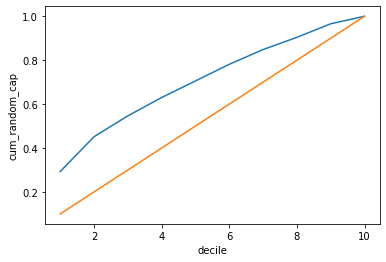

In [112]:
ax = sns.lineplot( x="decile", y="cum_event_cap", data=sorted_reindexed)
ax = sns.lineplot( x="decile", y="cum_random_cap", data=sorted_reindexed)